In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)

data=pd.read_csv('lin_reg_data.csv')
data.head()

,32.50234527,31.70700585
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [2]:
 class LinearRegressionL2:
        def __init__(self,X_data,Y_data,l,l2,iterations): #initialize all parameters
            self.X=X_data
            self.Y=Y_data
            #weight and bias
            self.m=0
            self.c=0
            self.L=l #learning rate
            self.l2=l2 #regularization parameter
            self.iter=iterations #num of iterations
            self.n=float(len(self.X))  #size of data
        
        def cost(self,pred_y): #cost function
            cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
            return(cost)
        
        def fit(self):
            self.history=np.zeros(self.iter)
            #updating values of m and c
            for i in range(self.iter):
                pred_y=self.m*self.X + self.c
                #print(pred_y)
                Dm= (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
                Dc= (-2/self.n)*(self.Y-pred_y)
                #update
                self.m=self.m-Dm*self.L
                self.c=self.c-Dc*self.L
                #cost is calculated for every iteration
                self.history[i]=self.cost(pred_y)
            self.mse=self.MSE(self.Y,pred_y)
                
                
                
       
        def MSE(self,pred_y,Y):
            errors=Y-pred_y #error is the difference between actual and predicted value
            mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
            return mse
        
        def results(self):
            fig=plt.figure(figsize=(14,14))
            a1=fig.add_subplot(211)

            plt.title('minimisation of errors across the iterations')
            a1.plot(self.history)


            #making predictions
            a2=fig.add_subplot(212)
            final_y=self.m*self.X +self.c 
            plt.scatter(self.X,self.Y)
            plt.title('regrssion line')
            a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
            
            plt.show()
            
            print ('Mean Squared Error=',self.mse)




Plotting the dataset using a scatter plot

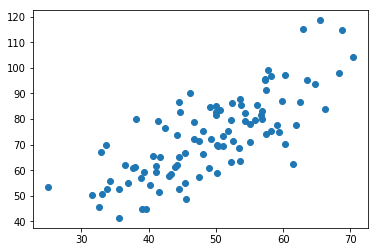

In [3]:
data=pd.read_csv('lin_reg_data.csv')
data.head()
X=data.iloc[:,0]
Y=data.iloc[:,1]
plt.scatter(X,Y)
plt.show()


In [5]:
l=LinearRegressionL2(X,Y,0.005,0.001,100)

In [6]:
l.fit()

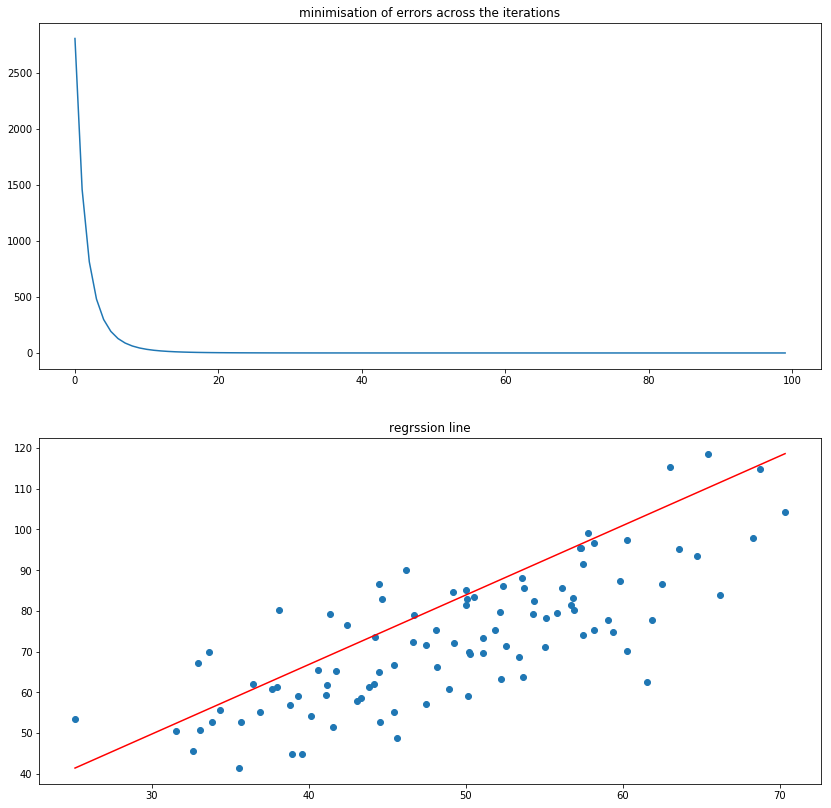

Mean Squared Error= 8.5291379739768e-05


In [7]:
l.results()